### This is SA-GA network aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran.  All copyright reserved by the author.
This program uploads on Github for available on Bioinformatics Journal reviewers.
2020/02/28

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "mm-ce-pop.pickle". Therefore, you must run follow steps:
1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections.
2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 
3) Run all remains cells to create results. 

### In the unknown target program, we assume don't have target in a run time of the algorithm. Afterward, run SA-GA aligner, we use target for evaluating criteria and give the performance of SA-GA network aligner method.
#### You can see the comment "****remove for unknown target****", wherever we changed.

# Load Graphs 

In [1]:
import pickle
with open('mm-mm-weighted.pickle', 'rb') as f:
    mmlist = pickle.load(f)

In [2]:
with open('ce-ce-weighted.pickle', 'rb') as f:
    celist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(mmlist)):
    if G1.has_node(mmlist[i][0])==False:
        G1.add_node(mmlist[i][0])
    if G1.has_node(mmlist[i][1])==False:
        G1.add_node(mmlist[i][1])
    G1.add_edge(mmlist[i][0],mmlist[i][1],weight=mmlist[i][2])
G1

In [4]:
G2=nx.Graph()
for i in range(len(celist)):
    if G2.has_node(celist[i][0])==False:
        G2.add_node(celist[i][0])
    if G2.has_node(celist[i][1])==False:
        G2.add_node(celist[i][1])
    G2.add_edge(celist[i][0],celist[i][1],weight=celist[i][2])
G2

# Swap graphs if len G1 > len G2

In [5]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp

In [6]:
ed1=G1.edges()

In [7]:
nd1=G1.nodes()

In [8]:
ed2=G2.edges()

In [9]:
nd2=G2.nodes()

In [10]:
el1=list(ed1)
el2=list(ed2)

In [11]:
nd1=list(nd1)
nd2=list(nd2)

In [12]:
degG1 = [val for (node, val) in G1.degree()]


In [13]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [14]:
G_target_na=nx.read_weighted_edgelist('ce-mm.evals')
G_target_na 

In [16]:
gtnode=list(G_target_na.nodes())
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

In [17]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())           
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target_na=G_target
G_target_na

# Compute Score for create similarity matrix

In [18]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [19]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [20]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [21]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [22]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [23]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [24]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [25]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [26]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [36]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [37]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [38]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])

# multi processing for speed up

In [39]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [40]:
#%%prun
import random
import threading

len_pop=300
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
                   
    print('in for loop')
    
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1task2

task3
Done!, i= 1
wait
in for loop
task1task2

task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2task3

Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2
task3
Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[0.000e+00, 3.640e+02],
        [1.000e+00, 3.480e+02],
        [2.000e+00, 3.570e+02],
        ...,
        [2.987e+03, 2.466e+03],
        [2.988e+03, 5.320e+03],
        [2.989e+03, 4.318e+03]],

       [[0.000e+00, 3.640e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 4.310e+02],
        ...,
        [2.987e+03, 3.427e+03],
        [2.988e+03, 1.830e+02],
        [2.989e+03, 5.243e+03]],

       [[0.000e+00, 3.640e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 3.570e+02],
        ...,
        [2.987e+03, 4.870e+03],
        [2.988e+03, 2.274e+03],
        [2.989e+03, 4.291e+03]],

       ...,

       [[0.000e+00, 1.530e+02],
        [1.000e+00, 7.630e+02],
        [2.000e+00, 3.570e+02],
        ...,
        [2.987e+03, 2.708e+03],
        [2.988e+03, 2.564e+03],
        [2.989e+03, 5.469e+03]],

       [[0.000e+00, 1.530e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 3.480e+02],
        ...,
        [2.987e+03, 2.247e+03],
        [2.988e+03

# save population

In [41]:
import pickle
with open('mm-ce-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [42]:
import pickle
with open('mm-ce-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

# load population

In [27]:
import pickle
with open('mm-ce-base_permute.pickle', 'rb') as f:
    base_permute = pickle.load(f)

In [28]:
with open('mm-ce-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [29]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j])): #and G_target_na.has_edge(a[i],b[j])): ****remove for unknown target****
                return True
    return False 

In [30]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [31]:
len_pop=len(pop)
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)
num_seq=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))


for i in range(len(p)):
    ea=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                          
         #if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):  ****remove for unknown target****
        num_seq[i]+=1  # create sequence matrix 
        map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
        if (ec_func(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])])):
            ea=ea+1                
            
        nc=nc+2
                 
    score_ec[i]=(ea/G1.number_of_edges())*100
    score_ics[i]=(ea/num_induced)*100
    score_s3[i]=(ea/(G1.number_of_edges()+num_induced-ea))*100
    score_nc[i]=(nc/(G1.number_of_nodes()))*100 # node coverage    
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('node coverage: ',score_nc)
print('node correctness',score_ncorectness)

ec
[35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727

## number of matched sequences 

In [32]:
num_seq

array([623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 62

## compute topology score

In [33]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[13556.89730816 15469.54911568 14366.89933871 15078.13092308
 15245.85182989 15717.91309174 14962.90519513 16414.39451422
 15296.89813708 13293.91231935 15452.10883646 14549.91689341
 13450.46452182 14173.75620021 15452.10883646 15955.78572354
 14785.35209674 14397.08185564 15452.10883646 13733.48988311
 14217.86533385 15279.84476281 13706.02294571 13624.2774083
 15012.0712975  14397.08185564 14473.09590296 16673.98921971
 15128.05843809 14519.09084343 14962.90519513 15279.84476281
 14043.05577539 15178.31769735 15400.0231486  15974.38218532
 15012.0712975  14565.37905662 14488.39513616 15094.73677059
 13651.41736097 14658.8465929  13583.76921332 15699.908634
 14366.89933871 13610.7478589  14028.6821474  14336.84310847
 13624.2774083  14159.11391204 15012.0712975  14351.85548734
 15993.02204607 14817.32037944 14643.1854548  14412.22072059
 15610.50153171 15575.02316792 13583.76921332 13516.78820711
 14690.26958382 14071.89157527 14100.84604098 15279.84476281
 15228.91201832 15348.28742

# Compute Topology and Sequence score

In [34]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([7089.94865408, 8046.27455784, 7494.94966936, 7850.56546154,
       7934.42591495, 8170.45654587, 7792.95259757, 8518.69725711,
       7959.94906854, 6958.45615967, 8037.55441823, 7586.4584467 ,
       7036.73226091, 7398.3781001 , 8037.55441823, 8289.39286177,
       7704.17604837, 7510.04092782, 8037.55441823, 7178.24494156,
       7420.43266693, 7951.42238141, 7164.51147286, 7123.63870415,
       7817.53564875, 7510.04092782, 7548.04795148, 8648.49460986,
       7875.52921904, 7571.04542172, 7792.95259757, 7951.42238141,
       7333.02788769, 7900.65884868, 8011.5115743 , 8298.69109266,
       7817.53564875, 7594.18952831, 7555.69756808, 7858.86838529,
       7137.20868048, 7640.92329645, 7103.38460666, 8161.454317  ,
       7494.94966936, 7116.87392945, 7325.8410737 , 7479.92155423,
       7123.63870415, 7391.05695602, 7817.53564875, 7487.42774367,
       8308.01102304, 7720.16018972, 7633.0927274 , 7517.61036029,
       8116.75076586, 8099.01158396, 7103.38460666, 7069.89410

## Define function for fitness and compute final score

In [35]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [36]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        #if G_target_na.has_edge(nd1[x1],nd2[x2]):   ****remove for unknown target****
        num_seq_temp+=1 
        if (ec_func(nd1[x1],nd2[x2])):
            ec_temp=ec_temp+1                
        nc_temp=nc_temp+2
                 
    score_ec_temp=(ec_temp/G1.number_of_edges())*100
    score_ics_temp=(ec_temp/counter_induced)*100
    score_s3_temp=(ec_temp/(G1.number_of_edges()+counter_induced-ec_temp))*100
    score_nc_temp=(nc_temp/G1.number_of_nodes())*100 # node coverage 
    score_ncorectness=(nc/G_target_na.number_of_nodes())*100
    
     # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('node coverage: ',score_nc_temp)
        print('node correctness: ',score_ncorectness)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    return score_temp,pre,rec,fsc


In [37]:
def crossover(index,r1): 
    tp=[]
    
    for i in range(len_pop-1):            
            if (r1>0):
                alpha=random.random()
                P_crossover=(pop[i][dim]*r1-r1*2*alpha)/1000
                print(P_crossover)
                tp.append(pop[i][0:len_G1])                
                for j in range(int(P_crossover)):
                    x=random.randint(0,len_G1-1)
                    #print('x',x)
                    y=np.argmax(m[x])
                    #print('y',y,'index',index,len(tp))
                    #print(tp[index])
                    #print(nd1[int(tp[index][x][0])],nd2[y])
                    #print('crossover ===============',G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y]))  
                    #if (G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y])):    ****remove for unknown target****                                                
                    tp[index][x][1]=y
                    fit,pre,rec,fsc=Fitness(tp[index],counter_induced)
                    tp[index].append(fit)
                    if(fit>pop[i][dim]):
                        pool.append(tp)
                        print('move crossover')
                index=index+1

In [38]:
def mutation(index):   
    tp=[]
    for i in range(len_pop-1):
        pm=random.random()
        if (pm>0.1):               
            tp.append(pop[i][0:len_G1])
            x=random.randint(0,len_G1-1)
            #print('x',x)
            y=np.argmax(m[x])
            #print('y',y,'index',index,len(tp),tp[index])
            #print(nd1[int(tp[index][x][0])],nd2[y])
            #print('mutation=====',G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y]))
            #if (G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y])):  ****remove for unknown target****                                                  
            tp[index][x][1]=y                            
            fit,pre,rec,fsc=Fitness(tp[index],counter_induced)
            tp[index].append(fit)
            if(fit>pop[i][dim]):
                pool.append(tp)
                print('move mutation')
            index=index+1

# Hybrid SA-GA proposed method

In [39]:
# Implementation of Hybrid SA-GA Algorithm
import random
from operator import itemgetter
import concurrent.futures

len_G1=len(G1)
pool=[]
dim=len_G1
pop=p.tolist()

[pop[i].append(score[i]) for i in range(len_pop)]
#[print(pop[i][dim]) for i in range(len_pop)]

pop=sorted(pop, key=itemgetter(dim),reverse=True)


GBest=pop[0]
#print("GBest: ",GBest)


iteration=0
max_epoch=2

GbestFlag=False
max_score=max(score)
r1=10 #temperature

while (iteration<max_epoch and r1>0): 
    # counter induced for ics compute            
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future = executor.submit(induced_function_for_pop,GBest)
        counter_induced = future.result()
        #print("counter induced: ",counter_induced)
    
    index=0
    print('it',iteration)
    crossover(index,r1)
    mutation(index)
                
    # selection
    if(len(pool)>0):
        pool=pool[0][0:len(pool[0])]
        pool=sorted(pool, key=itemgetter(dim), reverse=True)
        pop[-len(pool):]=pool[0:]
        pop=sorted(pop, key=itemgetter(dim),reverse=True)
        pool=[]
    if (pop[0][dim]>GBest[dim]):
        GBest=pop[0]
    r1=r1-0.1
    iteration=iteration+1
    
#print("GBest: ",GBest)    
print("score:", score)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(pop[i][j][0])],nd2[int(pop[i][j][1])]):
            map_items.append([nd1[int(pop[i][j][0])],nd2[int(pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(pop[i][j][0])],nd2[int(pop[i][j][1])])) 

print("end")

it 0
88.2394333033271
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
score: 8824.555137097523
sco

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
85.87697165079612
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
81.69443897879235
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
81.51752802820934
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
81.15296160077295
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
80.9806876676494
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.55513709752

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
79.84474278964902
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
79.75144107337599
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
78.99842729464127
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
78.99268286552355
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
78.16963602311326
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
77.91866850542193
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
76.95090901931687
score: 8824.555137097523
move crossover
score: 8824.5551370975

move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
76.48233678533647
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
75.62899247575093
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
75.55063086429976
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
75.017161588751
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
74.79411618594979
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
74.72257012263287
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
73.97239155276701
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
73.69010381113668
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
73.32203181054791
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
73.10887301746601
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
72.320947767358
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
72.04011990515197
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
71.43872464065856
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
71.23460026319918
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
69.96705410005154
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.5551370975

score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover
score: 8824.555137097523
move crossover


score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523
move mutation
score: 8824.555137097523


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3461410887334
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35989480701359
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34497180930184
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35956170015275
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35756378126028
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34333184687941
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34582188133339
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.36189764656667
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34962861882867
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35529238685272
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34572244146499
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.36126697730174
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
87.35481487439988
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3549223694817
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34720982807956
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35749594437317
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34568976883283
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3577357886541
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35271926832358
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3596067422464
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34445969482363
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3494051776376
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3452723654894
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
87.35938439536707
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35685734683702
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35340100926454
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.35563797677743
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3453203757256
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.3605716411003
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
87.34798868549605
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 

score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849
score: 8431.179865809849


In [40]:
# Gbest
gb=pop[0]
#del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
35.39772727272727
ics
73.81516587677726
s3
31.448763250883395
node coverage:  200.0
node correctness:  106.40478223740392
num_seq 623
precision:  15.401730531520396
Recall:  99.83974358974359
F-score:  26.686656671664167
score: 8431.179865809849
gbest fitness  8431.179865809849


# create weighted graph of network alignment

In [41]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['mm19455', 'ce9690', 74],
 ['mm1405', 'ce3575', 81],
 ['mm2818', 'ce1747', 153],
 ['mm5287', 'ce3430', 402],
 ['mm4911', 'ce3430', 127],
 ['mm5453', 'ce3430', 54],
 ['mm4668', 'ce1686', 1189],
 ['mm14022', 'ce1686', 579],
 ['mm9696', 'ce14248', 46],
 ['mm5042', 'ce5393', 103],
 ['mm3362', 'ce3403', 426],
 ['mm9669', 'ce7388', 512],
 ['mm3314', 'ce3403', 417],
 ['mm8390', 'ce7026', 640],
 ['mm5138', 'ce7388', 77],
 ['mm3178', 'ce3694', 91],
 ['mm9309', 'ce5393', 90],
 ['mm1793', 'ce7388', 66],
 ['mm2048', 'ce2340', 49],
 ['mm3367', 'ce2340', 294],
 ['mm407', 'ce2190', 125],
 ['mm8699', 'ce11741', 148],
 ['mm14063', 'ce5575', 158],
 ['mm11243', 'ce8246', 298],
 ['mm2123', 'ce630', 182],
 ['mm2153', 'ce1825', 95],
 ['mm6374', 'ce11889', 70],
 ['mm3821', 'ce9381', 100],
 ['mm7887', 'ce9381', 246],
 ['mm8967', 'ce3256', 146],
 ['mm2895', 'ce2980', 231],
 ['mm1347', 'ce622', 121],
 ['mm4294', 'ce3016', 117],
 ['mm11480', 'ce1979', 226],
 ['mm5183', 'ce409', 187],
 ['mm5034', 'ce630', 94],


## Remove duplication and local alignment
## Compute Global Alignment

In [42]:
unique_xmap=list(set(tuple(y) for y in x))

In [43]:
unique_xmap

[('mm32', 'ce522', 79),
 ('mm5422', 'ce1197', 58),
 ('mm1092', 'ce2246', 54),
 ('mm9309', 'ce5179', 70),
 ('mm755', 'ce4948', 182),
 ('mm3055', 'ce7323', 202),
 ('mm3405', 'ce2820', 249),
 ('mm1877', 'ce15494', 93),
 ('mm8390', 'ce10758', 56),
 ('mm847', 'ce136', 54),
 ('mm8758', 'ce3738', 87),
 ('mm5807', 'ce11240', 95),
 ('mm13853', 'ce16004', 81),
 ('mm3821', 'ce878', 86),
 ('mm4709', 'ce3102', 730),
 ('mm1631', 'ce547', 102),
 ('mm19603', 'ce17241', 97),
 ('mm1305', 'ce14445', 100),
 ('mm831', 'ce2980', 70),
 ('mm7391', 'ce9825', 50),
 ('mm8660', 'ce851', 92),
 ('mm14063', 'ce1617', 84),
 ('mm8183', 'ce8460', 71),
 ('mm11476', 'ce1168', 50),
 ('mm10672', 'ce8307', 702),
 ('mm5657', 'ce5264', 48),
 ('mm3866', 'ce1691', 64),
 ('mm3186', 'ce2533', 206),
 ('mm8183', 'ce6548', 148),
 ('mm2895', 'ce3256', 90),
 ('mm17223', 'ce1198', 47),
 ('mm2868', 'ce108', 63),
 ('mm2398', 'ce1750', 53),
 ('mm8758', 'ce6124', 72),
 ('mm1598', 'ce1126', 180),
 ('mm2709', 'ce4172', 160),
 ('mm5688', 'ce4

In [44]:
print(len(x))
print(len(unique_xmap))

83101
2912


# Compute Global Measures

In [45]:
len(map_items)

83101

In [46]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

2912


In [47]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [48]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [49]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorectness=0
len_unique=len(unique_map)

count_induced=induced_function()

for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1 
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=(ec_temp/G1.number_of_edges())*100
score_ics_temp=(ec_temp/count_induced)*100
score_s3_temp=(ec_temp/(G1.number_of_edges()+count_induced-ec_temp))*100
score_nc_temp=(nc_temp/G1.number_of_nodes())*100 #node coverage 
score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if(score_ncorectness>100):
    score_ncorectness=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100"""

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('node coverage: ',score_nc_temp)
print('node correctness: ',score_ncorectness)
print('num_seq',num_seq_temp)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
165.45454545454547
ics
60.15286097913655
s3
78.93738140417457
node coverage:  934.8314606741573
node correctness:  497.3526900085397
num_seq 2912
score: 8072.864764495825


# save and load map

In [50]:
import pickle
with open('mm-ce-weightGraph-unknown.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('mm-ce-weightGraph-unknown.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

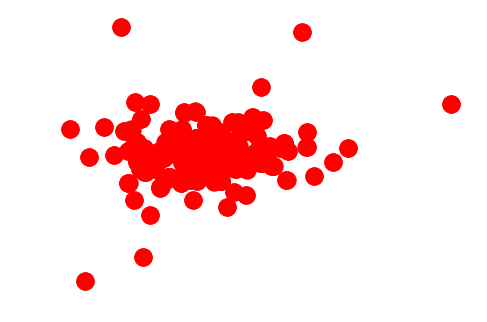

In [52]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [53]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  1123  nodes.
Aligned graph have  2912  edges.


In [54]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  1171  nodes.
Target graph have  4045  edges.


In [55]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  345171
Total Weight in Target:  422185


In [56]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  106
number of different connected components in Target graph:  104


In [57]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'ce8116', 'ce2505', 'ce3569', 'mm2301', 'ce362', 'ce4683', 'ce1560', 'mm17603', 'mm643', 'ce4190', 'ce14510', 'mm11666', 'ce1737', 'ce730', 'mm1255', 'mm1162', 'ce5264', 'ce10400', 'mm412', 'mm603', 'ce799', 'ce1750', 'mm5657', 'ce3612', 'ce5255', 'ce741', 'ce4424', 'ce2315', 'ce14700', 'mm2048', 'ce1231', 'ce7446', 'ce7388', 'ce642', 'mm5361', 'mm231', 'mm2484', 'ce11390', 'ce2986', 'mm303', 'ce1814', 'ce1201', 'ce6440', 'ce3187', 'mm755', 'ce1166', 'ce5755', 'ce7922', 'ce3853', 'ce907', 'mm16191', 'ce12643', 'mm17221', 'mm7088', 'mm5678', 'mm4895', 'ce2640', 'ce10198', 'ce5776', 'ce4681', 'mm1837', 'mm592', 'ce4403', 'ce6025', 'ce6338', 'ce3402', 'ce3070', 'mm18233', 'mm6497', 'ce2825', 'mm2596', 'ce12226', 'mm1993', 'ce9424', 'ce2528', 'mm1631', 'mm9309', 'ce30', 'mm11761', 'ce3693', 'mm657', 'ce3147', 'ce370', 'ce15897', 'mm1793', 'ce1453', 'ce5575', 'ce3695', 'ce510', 'mm6584', 'ce85', 'ce5179', 'mm13853', 'ce994', 'mm6564', 'ce12318', 'ce1372', 'ce3570', 'ce16002', 'mm20870', '

In [58]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [59]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

101


In [60]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  584
Largest common connected graph in Target graph:  646


### check for mistake align

In [61]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# Compute Global Criteria Percents

In [62]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("Percent of EC: ",ratio_ec)
print("EC:",ratio_ec/100)

total EC:  229.82954545454547
Percent of EC:  71.99011124845488
EC: 0.7199011124845488


In [63]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("Percent of ICS: ",ratio_ics)
print("ICS:", ratio_ics/100)

total ICS:  83.55711629828548
Percent of ICS:  71.9901112484549
ICS: 0.7199011124845489


In [65]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("Percent of S3: ",ratio_s3)
print("S3:",ratio_s3/100)

total S3:  158.25508607198748
Percent of S3:  49.87983853376272
S3: 0.4987983853376272


# compute FC

In [66]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['mm32', 'ce522'],
 ['mm5422', 'ce1197'],
 ['mm1092', 'ce2246'],
 ['mm9309', 'ce5179'],
 ['mm755', 'ce4948'],
 ['mm3055', 'ce7323'],
 ['mm3405', 'ce2820'],
 ['mm1877', 'ce15494'],
 ['mm8390', 'ce10758'],
 ['mm847', 'ce136'],
 ['mm8758', 'ce3738'],
 ['mm5807', 'ce11240'],
 ['mm13853', 'ce16004'],
 ['mm3821', 'ce878'],
 ['mm4709', 'ce3102'],
 ['mm1631', 'ce547'],
 ['mm19603', 'ce17241'],
 ['mm1305', 'ce14445'],
 ['mm831', 'ce2980'],
 ['mm7391', 'ce9825'],
 ['mm8660', 'ce851'],
 ['mm14063', 'ce1617'],
 ['mm8183', 'ce8460'],
 ['mm11476', 'ce1168'],
 ['mm10672', 'ce8307'],
 ['mm5657', 'ce5264'],
 ['mm3866', 'ce1691'],
 ['mm3186', 'ce2533'],
 ['mm8183', 'ce6548'],
 ['mm2895', 'ce3256'],
 ['mm17223', 'ce1198'],
 ['mm2868', 'ce108'],
 ['mm2398', 'ce1750'],
 ['mm8758', 'ce6124'],
 ['mm1598', 'ce1126'],
 ['mm2709', 'ce4172'],
 ['mm5688', 'ce4590'],
 ['mm7258', 'ce15526'],
 ['mm3821', 'ce4264'],
 ['mm6549', 'ce4233'],
 ['mm1993', 'ce3570'],
 ['mm28', 'ce311'],
 ['mm3821', 'ce8736'],
 ['mm1953', 

# load ontology and create DAG graph

In [67]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

,0
0,GO:0046431 GO:0019599\n
1,GO:0046430 GO:0019595\n
2,GO:0046432 GO:0019361\n
3,GO:0034198 GO:0060733\n
4,GO:0046343 GO:0019872\n
5,GO:0034193 GO:0034195\n
6,GO:0034192 GO:0034194\n
7,GO:0034190 GO:0034191\n
8,GO:0046437 GO:0030632 GO:0070179\n
9,GO:0046340 GO:0046342\n


In [68]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [69]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0033947', '0032300', '0001548', '0006323', '0050393', '0070878', '0021636', '0002782', '0001672', '0032704', '0050104', '0034446', '0048824', '0048327', '0015775', '0016743', '0051281', '0004665', '0080126', '0018261', '0031438', '0040001', '0010421', '0005911', '0090151', '0050194', '0046801', '0071592', '0008906', '0008554', '0008595', '0018226', '0060180', '0032588', '0043916', '0002774', '0061083', '0005261', '0005262', '0007555', '0060321', '0033699', '0047958', '0045241', '0034737', '0042617', '0008794', '0046140', '0010550', '0031424', '0010999', '0030334', '0048704', '0048462', '0070720', '0033088', '0072176', '0051158', '0070930', '0060896', '0002299', '0046096', '0003861', '0051421', '0018361', '0010008', '0031466', '0018347', '0018072', '0034451', '0034019', '0005680', '0005967', '0016145', '0075251', '0072100', '0010604', '0004712', '0060290', '0002206', '0046919', '0047890', '0052155', '0009583', '0018154', '0034557', '0047673', '0048010', '0019649', '0019800', '0032591'

In [70]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [71]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [72]:
# To unify the data, we need to delete the two letters of annotations and replace zero to achieve string with 7 lengths.
## According to species, these letters are different.
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('mm' in tree[i][j] or 'ce' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

2912 5824
2912


In [73]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.583002457931556
